In [1]:
using DataFrames
using SolverBenchmark
using SolverTools
using JLD2

In [6]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\StageOptim\\amdahl_benchmarks\\results"
# gurobi_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"
# cplex_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\cplex"

"C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\StageOptim\\amdahl_benchmarks\\results"

In [16]:
# ρ_min, δ_min = 1e-5*T(sqrt(eps())), 1e0*T(sqrt(eps()))
file_test = jldopen(string(res_path, "\\mehrotra_qp_test.jld2"), "r") 
mehrotra_test = file_test["stats"];
close(file_test)
file_test2 = jldopen(string(res_path, "\\mehrotra_qp_test2.jld2"), "r") 
mehrotra_test2 = file_test2["stats"];
close(file_test2)

# same with init diag 1e-2
file1 = jldopen(string(res_path, "\\mehrotra_qp1.jld2"), "r") 
mehrotra1 = file1["stats"];
close(file1)
# same with init diag 1e-1, ρ0=1e5*sqrt(eps()), δ0=1e6*sqrt(eps)
file2 = jldopen(string(res_path, "\\mehrotra_qp2.jld2"), "r") 
mehrotra2 = file2["stats"];
close(file2)
# init diag 1e-0, ρ0=1e5*sqrt(eps()), δ0=1e8*sqrt(eps)
file3 = jldopen(string(res_path, "\\mehrotra_qp3.jld2"), "r") 
mehrotra3 = file3["stats"];
close(file3)
# init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps)
file4 = jldopen(string(res_path, "\\mehrotra_qp4.jld2"), "r") 
mehrotra4 = file4["stats"];
close(file4)
# same 4 with ϵ_pdd=1e-6
file4bis = jldopen(string(res_path, "\\mehrotra_qp4bis.jld2"), "r") 
mehrotra4bis = file4bis["stats"];
close(file4bis)
# init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), s/x_m_lvar control
file5 = jldopen(string(res_path, "\\mehrotra_qp5.jld2"), "r") 
mehrotra5 = file5["stats"];
close(file5)
# init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), s/x_m_lvar control with ϵ_pdd=1e-6
file5bis = jldopen(string(res_path, "\\mehrotra_qp5bis.jld2"), "r") 
mehrotra5bis = file5bis["stats"];
close(file5bis)

In [17]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(mehrotra5bis)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,AUG2D,20200,10000,0,acceptable,1.68741e6,1.38058,4,1.63153e-7,3.5573e-6,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
2,2,AUG2DC,20200,10000,0,acceptable,1.81837e6,0.218192,4,1.98134e-7,4.49562e-6,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
3,3,AUG2DCQP,20200,10000,0,acceptable,6.49813e6,0.832812,11,0.000138253,2.71795e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
4,4,AUG2DQP,20200,10000,0,acceptable,6.23701e6,0.501249,11,0.00854817,8.52352e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
5,5,AUG3D,3873,1000,0,acceptable,554.068,0.0274041,3,6.90872e-10,5.32296e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
6,6,AUG3DC,3873,1000,0,acceptable,771.262,0.0294511,3,1.30586e-9,1.68836e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
7,7,AUG3DCQP,3873,1000,0,acceptable,993.362,0.0641561,9,1.51058e-13,4.2009e-12,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
8,8,AUG3DQP,3873,1000,0,acceptable,675.238,0.0628669,9,4.67024e-13,2.12679e-14,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
9,9,BOYD1,93261,18,0,acceptable,-6.17352e7,2.27893,15,0.26367,0.0333525,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,


In [18]:
stats = Dict(:mehrotra_test=>mehrotra_test, :mehrotra1=> mehrotra1, :mehrotra2=> mehrotra2, 
             :mehrotra3=> mehrotra3, :mehrotra4=> mehrotra4, :mehrotra5 => mehrotra5)
stats_bis = Dict(:mehrotra4bis=>mehrotra4bis, :mehrotra5bis=>mehrotra5bis)

Dict{Symbol,DataFrame} with 2 entries:
  :mehrotra4bis => 123×33 DataFrame. Omitted printing of 26 columns…
  :mehrotra5bis => 123×33 DataFrame. Omitted printing of 26 columns…

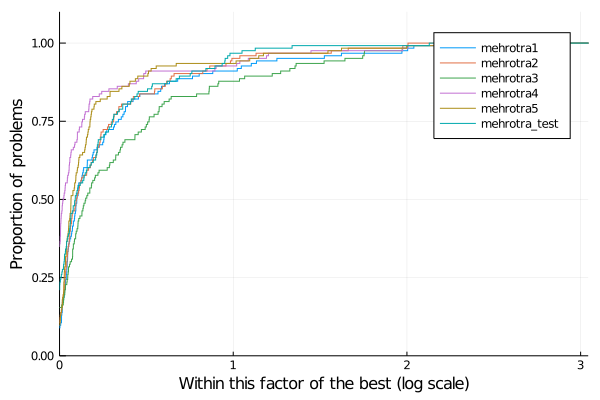

In [19]:
performance_profile(stats, df->df.elapsed_time)

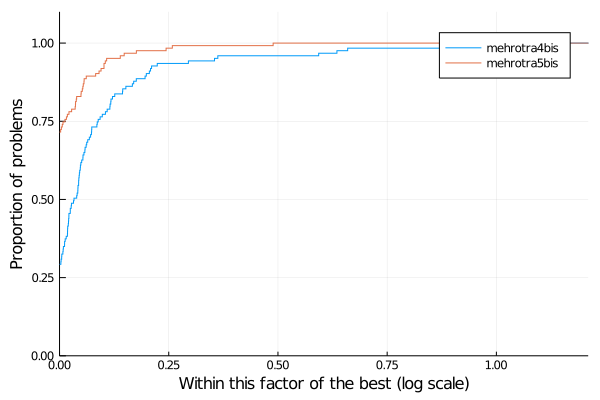

In [20]:
performance_profile(stats_bis, df->df.elapsed_time)